In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt
from sklearn.neighbors import kneighbors_graph
import scipy as sc
import numpy as np

In [3]:
with open('dataset/review.json') as json_file:      
    data = json_file.readlines()
    # this line below may take at least 8-10 minutes of processing for 4-5 million rows. It converts all strings 
    # in list to actual json objects. 
    data = list(map(json.loads, data)) 

review = pd.DataFrame(data)
review 

UnicodeDecodeError: 'charmap' codec can't decode byte 0x8f in position 5601: character maps to <undefined>

In [ ]:
# review_cool_id = review[['cool', 'user_id']] #.iloc
# review_cool_id

In [15]:
with open('dataset/business.json') as json_file:      
    data = json_file.readlines()
    # this line below may take at least 8-10 minutes of processing for 4-5 million rows. It converts all strings in list to actual json objects. 
    data = list(map(json.loads, data)) 

business = pd.DataFrame(data)

In [22]:
df = business[['latitude', 'longitude']]

In [20]:
#dfna  = df.dropna() #[pd.notnull(df)]

In [25]:
dfna.isnull().any()

latitude     False
longitude    False
dtype: bool

In [26]:
x_geo = dfna.values 

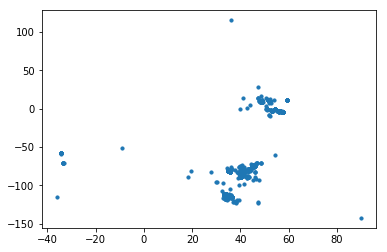

In [27]:
plt.scatter(x_geo[:,0], x_geo[:,1], s=10)
plt.show()

In [28]:
A = kneighbors_graph(x_geo, n_neighbors=5, include_self=False)
A = A + A.T

In [29]:
from matplotlib.collections import LineCollection

def show_graph(X, graph):
    if sc.sparse.isspmatrix(graph):
        non_zero = (sc.sparse.triu(graph, k=1) > 0)
        idx = sc.sparse.find(non_zero)
        start_idx, end_idx = idx[:2]
    else:
        non_zero = (np.triu(graph, k=1) > 0)
        start_idx, end_idx = np.where(non_zero)

    segments = np.zeros((len(start_idx), 2, 2), float)
    for i, (start,stop) in enumerate( zip(start_idx,end_idx) ):
        segments[i,:,0] = X[(start,stop),0]
        segments[i,:,1] = X[(start,stop),1]

    lc = LineCollection(segments, zorder=0)
    lc.set_linewidths(1)

    ax = plt.axes()
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_xlim(segments[:,:,0].min(), segments[:,:,0].max())
    ax.set_ylim(segments[:,:,1].min(), segments[:,:,1].max())
    ax.add_collection(lc)
    plt.show()

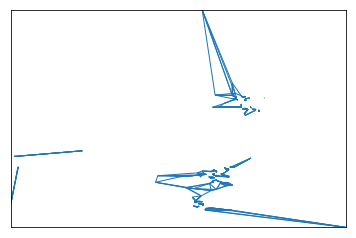

In [30]:
show_graph(x_geo, A)

In [33]:
with open('dataset/tip.json') as json_file:      
    data = json_file.readlines()
    # this line below may take at least 8-10 minutes of processing for 4-5 million rows. 
    # It converts all strings in list to actual json objects. 
    data = list(map(json.loads, data)) 

tip = pd.DataFrame(data)
tip

UnicodeDecodeError: 'charmap' codec can't decode byte 0x81 in position 2657: character maps to <undefined>

In [ ]:
with open('dataset/user.json') as json_file:      
    data = json_file.readlines()
    # this line below may take at least 8-10 minutes of processing for 4-5 million rows. It converts all strings in list to actual json objects. 
    data = list(map(json.loads, data)) 

user = pd.DataFrame(data)[0]
user